<a href="https://colab.research.google.com/github/ThGenerali/APS/blob/master/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [33]:
#upload do arquivo
from google.colab import files
arquivo = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks (2).xlsx


In [34]:
#Criando nosso DataFrame (df)
df = pd.read_excel("AdventureWorks.xlsx")
#verificando o arquivo
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [35]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [36]:
#Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [37]:
df["Valor Venda"].sum()

5984606.1426

In [40]:
#Criando coluna custo
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [41]:
#Qual custo total?
round(df["custo"].sum(), 2)

2486783.05

In [42]:
#Criando coluna do lucro total
df["lucro"] = df["Valor Venda"] - df["custo"]
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [43]:
#total lucro
round(df["lucro"].sum(), 2)

3497823.09

In [44]:
#criando coluna com total de dias para enviar produto
df["Tempo envio"] = df["Data Envio"] - df["Data Venda"]
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [45]:
#Quantidade de linhas e colunas
df.shape

(904, 19)

**Agora, queremos saber a média do tempo do envio para Marca, e para isso precisamos transformar a colua "Tempo envio" em numérica**

In [46]:
#Extraindo apenas os dias
df["Tempo envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [47]:
#Verificando o tipo de dado da coluna Tempo envio
df["Tempo envio"].dtypes

dtype('int64')

In [48]:
#Média do tempo de envio por marca
df.groupby("Marca")["Tempo envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo envio, dtype: float64

**Valores Nulos**

In [49]:
#Verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo envio       0
dtype: int64

**Lucro anual e por marca**

In [53]:
#Agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [90]:
##arredondando os valores flutuantes
pd.options.display.float_format = '{:20,.2f}'.format

In [57]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"(:20,.2f)"
1,2008,Contoso,"(:20,.2f)"
2,2008,Fabrikam,"(:20,.2f)"
3,2009,Adventure Works,"(:20,.2f)"
4,2009,Contoso,"(:20,.2f)"
5,2009,Fabrikam,"(:20,.2f)"


In [58]:
#Qual total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

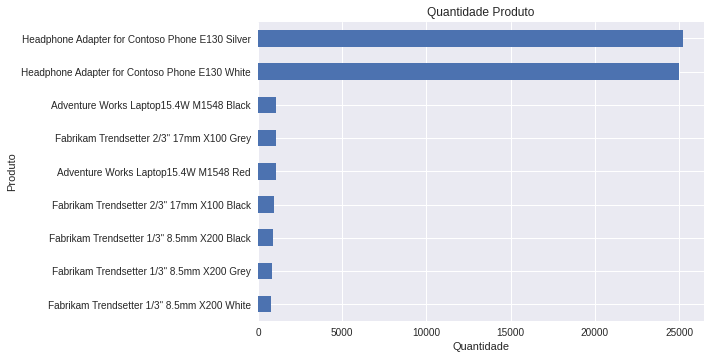

In [60]:
#Gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title = "Quantidade Produto")
plt.xlabel("Quantidade")
plt.ylabel("Produto")

Text(0, 0.5, 'Ano')

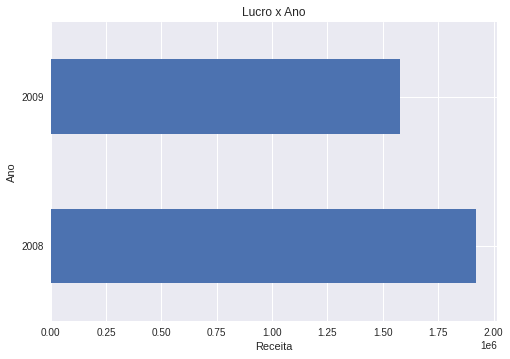

In [61]:
#Gráfico de lucro por ano
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.barh(title = "Lucro x Ano")
plt.xlabel("Receita")
plt.ylabel("Ano")

In [62]:
#Selecionando apenas as vendas de 2009
df_2009= df[df["Data Venda"].dt.year == 2009]
df_2009

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,"(:20,.2f)","(:20,.2f)",6,"(:20,.2f)","(:20,.2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20,.2f)","(:20,.2f)",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,"(:20,.2f)","(:20,.2f)",6,"(:20,.2f)","(:20,.2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20,.2f)","(:20,.2f)",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,"(:20,.2f)","(:20,.2f)",6,"(:20,.2f)","(:20,.2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20,.2f)","(:20,.2f)",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,"(:20,.2f)","(:20,.2f)",6,"(:20,.2f)","(:20,.2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20,.2f)","(:20,.2f)",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,"(:20,.2f)","(:20,.2f)",6,"(:20,.2f)","(:20,.2f)",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"(:20,.2f)","(:20,.2f)",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,2009-12-23,2009-12-30,199,1155,19033,200912234CS949,"(:20,.2f)","(:20,.2f)",6,"(:20,.2f)","(:20,.2f)",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"(:20,.2f)","(:20,.2f)",7
895,2009-01-11,2009-01-18,307,1155,19113,200901114CS680,"(:20,.2f)","(:20,.2f)",6,"(:20,.2f)","(:20,.2f)",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"(:20,.2f)","(:20,.2f)",7
896,2009-03-04,2009-03-15,307,1155,19117,200903044CS706,"(:20,.2f)","(:20,.2f)",6,"(:20,.2f)","(:20,.2f)",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"(:20,.2f)","(:20,.2f)",11
897,2009-06-12,2009-06-22,307,1226,19126,200906124CS716,"(:20,.2f)","(:20,.2f)",6,"(:20,.2f)","(:20,.2f)",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"(:20,.2f)","(:20,.2f)",10


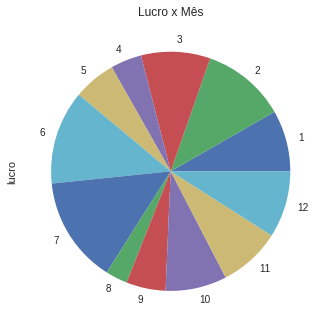

In [85]:
#Criando gráfico de lucro por mês em 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot.pie(title = "Lucro x Mês");


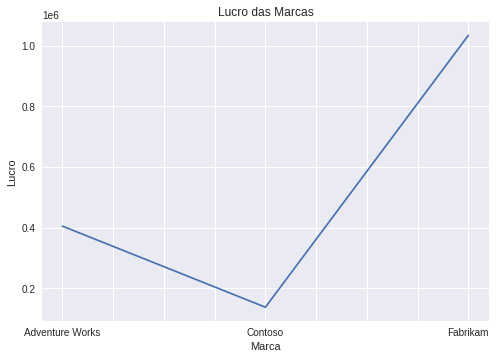

In [86]:
#Gráfico do lucro das marcas
df_2009.groupby("Marca")["lucro"].sum().plot(title = "Lucro das Marcas")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal");

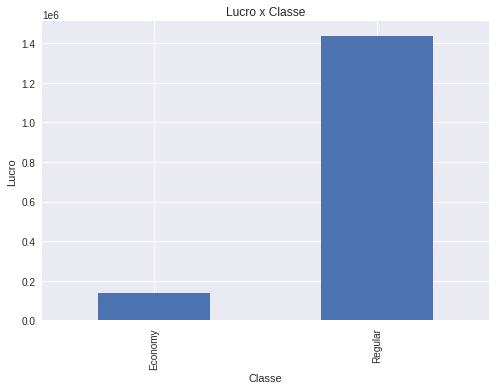

In [87]:
#Gráfico lucro por classe
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title = "Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro");

In [92]:
#Análises de uma coluna
df_2009["Tempo envio"].describe()

count                 435.00
mean                    8.77
std                     2.98
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    13.00
Name: Tempo envio, dtype: float64

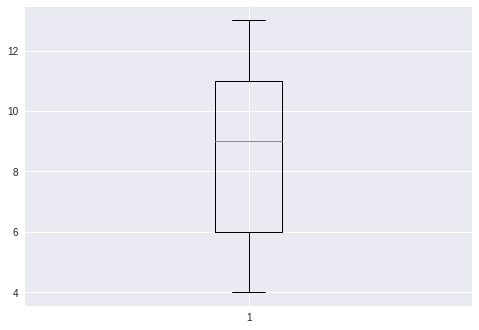

In [93]:
#Gráfico de boxplot
plt.boxplot(df_2009["Tempo envio"]);

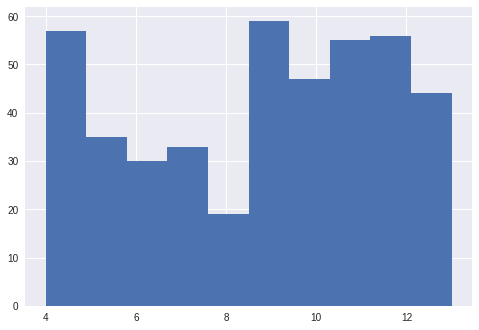

In [94]:
#Hisograma
plt.hist(df_2009["Tempo envio"]);

In [95]:
#tempo mínimo de envio
df_2009["Tempo envio"].min()

4

In [96]:
#tempo máximo de envio
df_2009["Tempo envio"].max()

13

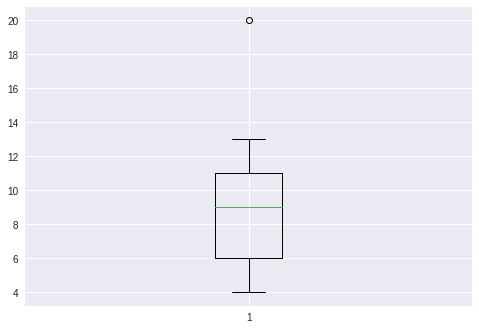

In [97]:
#verificando o outlier
plt.boxplot(df["Tempo envio"]);

In [98]:
#indentificando outlier
df[df["Tempo envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [99]:
#salvar a análise
df.to_csv("df_vendas_novo.csv", index = False)